In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [28]:
df=pd.read_csv("listings.csv")

In [29]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,159736,A double Room 5mins from King's College Hospital,766056,Trevor,NaN,Lambeth,51.46788,-0.09993,Private room,65.0,4,96,2023-04-29,0.62,4,268,1,NaN
1,312761,Spacious Central London Apartment by Hoxton Sq...,1608226,Pippa,NaN,Hackney,51.52704,-0.08129,Entire home/apt,160.0,9,122,2024-02-03,0.86,1,81,26,NaN
2,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,65.0,1,41,2023-11-26,0.25,3,351,1,NaN
3,165336,Charming Flat in Notting Hill,761400,Nathan,NaN,Kensington and Chelsea,51.51735,-0.21076,Entire home/apt,100.0,1,237,2024-03-17,1.57,1,3,25,NaN
4,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,120.0,4,94,2023-05-01,0.54,1,88,2,NaN


In [30]:
df.shape

(90857, 18)

In [32]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90857 entries, 0 to 90856
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              90857 non-null  int64  
 1   name                            90857 non-null  object 
 2   host_id                         90857 non-null  int64  
 3   host_name                       90847 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   90857 non-null  object 
 6   latitude                        90857 non-null  float64
 7   longitude                       90857 non-null  float64
 8   room_type                       90857 non-null  object 
 9   price                           57888 non-null  float64
 10  minimum_nights                  90857 non-null  int64  
 11  number_of_reviews               90857 non-null  int64  
 12  last_review                     

In [36]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


In [37]:
df.describe

<bound method NDFrame.describe of                         id                                               name  \
0                   159736   A double Room 5mins from King's College Hospital   
1                   312761  Spacious Central London Apartment by Hoxton Sq...   
2                    13913                Holiday London DB Room Let-on going   
3                   165336                      Charming Flat in Notting Hill   
4                    15400                Bright Chelsea  Apartment. Chelsea!   
...                    ...                                                ...   
90852  1114561613531375246    Stratford Comfort! - 1 bed-short term available   
90853  1114561687060213658            Cosy Studio Near Sundridge Park Station   
90854  1114562734360585561           Ideal for Tourists, London Center Studio   
90855  1114568910730325677                                Home away from home   
90856  1114569743661178852                 Sundridge Park Hideaway in Bromley   

         host_id     host_name  neighbourhood_group           neighbourhood  \
0         766056        Trevor                  NaN                 Lambeth   
1        1608226         Pippa                  NaN                 Hackney   
2          54730         Alina                  NaN               Islington   
3         761400        Nathan                  NaN  Kensington and Chelsea   
4          60302      Philippa                  NaN  Kensington and Chelsea   
...          ...           ...                  ...                     ...   
90852  114321509       Claudia                  NaN                  Newham   
90853  465237690  Anisul Hoque                  NaN                 Bromley   
90854  489306175      Rosimery                  NaN               Southwark   
90855   52494698        Shikha                  NaN               Southwark   
90856  465237690  Anisul Hoque                  NaN                 Bromley   

        latitude  longitude        room_type  price  minimum_nights  \
0      51.467880  -0.099930     Private room   65.0               4   
1      51.527040  -0.081290  Entire home/apt  160.0               9   
2      51.568610  -0.112700     Private room   65.0               1   
3      51.517350  -0.210760  Entire home/apt  100.0               1   
4      51.487800  -0.168130  Entire home/apt  120.0               4   
...          ...        ...              ...    ...             ...   
90852  51.530820  -0.010750     Private room   48.0               1   
90853  51.414637   0.018308     Private room   65.0               1   
90854  51.470910  -0.096680     Private room   79.0               1   
90855  51.498570  -0.049230     Private room   80.0               1   
90856  51.414899   0.018646  Entire home/apt   65.0               1   

       number_of_reviews last_review  reviews_per_month  \
0                     96  2023-04-29               0.62   
1                    122  2024-02-03               0.86   
2                     41  2023-11-26               0.25   
3                    237  2024-03-17               1.57   
4                     94  2023-05-01               0.54   
...                  ...         ...                ...   
90852                  0         NaN                NaN   
90853                  0         NaN                NaN   
90854                  0         NaN                NaN   
90855                  0         NaN                NaN   
90856                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  \
0                                   4               268   
1                                   1                81   
2                                   3               351   
3                                   1                 3   
4                                   1                88   
...                               ...               ...   
90852                               1               249   
90853     

In [38]:
df.dropna

<bound method DataFrame.dropna of                         id                                               name  \
0                   159736   A double Room 5mins from King's College Hospital   
1                   312761  Spacious Central London Apartment by Hoxton Sq...   
2                    13913                Holiday London DB Room Let-on going   
3                   165336                      Charming Flat in Notting Hill   
4                    15400                Bright Chelsea  Apartment. Chelsea!   
...                    ...                                                ...   
90852  1114561613531375246    Stratford Comfort! - 1 bed-short term available   
90853  1114561687060213658            Cosy Studio Near Sundridge Park Station   
90854  1114562734360585561           Ideal for Tourists, London Center Studio   
90855  1114568910730325677                                Home away from home   
90856  1114569743661178852                 Sundridge Park Hideaway in Bromley   

         host_id     host_name  neighbourhood_group           neighbourhood  \
0         766056        Trevor                  NaN                 Lambeth   
1        1608226         Pippa                  NaN                 Hackney   
2          54730         Alina                  NaN               Islington   
3         761400        Nathan                  NaN  Kensington and Chelsea   
4          60302      Philippa                  NaN  Kensington and Chelsea   
...          ...           ...                  ...                     ...   
90852  114321509       Claudia                  NaN                  Newham   
90853  465237690  Anisul Hoque                  NaN                 Bromley   
90854  489306175      Rosimery                  NaN               Southwark   
90855   52494698        Shikha                  NaN               Southwark   
90856  465237690  Anisul Hoque                  NaN                 Bromley   

        latitude  longitude        room_type  price  minimum_nights  \
0      51.467880  -0.099930     Private room   65.0               4   
1      51.527040  -0.081290  Entire home/apt  160.0               9   
2      51.568610  -0.112700     Private room   65.0               1   
3      51.517350  -0.210760  Entire home/apt  100.0               1   
4      51.487800  -0.168130  Entire home/apt  120.0               4   
...          ...        ...              ...    ...             ...   
90852  51.530820  -0.010750     Private room   48.0               1   
90853  51.414637   0.018308     Private room   65.0               1   
90854  51.470910  -0.096680     Private room   79.0               1   
90855  51.498570  -0.049230     Private room   80.0               1   
90856  51.414899   0.018646  Entire home/apt   65.0               1   

       number_of_reviews last_review  reviews_per_month  \
0                     96  2023-04-29               0.62   
1                    122  2024-02-03               0.86   
2                     41  2023-11-26               0.25   
3                    237  2024-03-17               1.57   
4                     94  2023-05-01               0.54   
...                  ...         ...                ...   
90852                  0         NaN                NaN   
90853                  0         NaN                NaN   
90854                  0         NaN                NaN   
90855                  0         NaN                NaN   
90856                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  \
0                                   4               268   
1                                   1                81   
2                                   3               351   
3                                   1                 3   
4                                   1                88   
...                               ...               ...   
90852                               1               249   
90853     

In [39]:
df.duplicated

<bound method DataFrame.duplicated of                         id                                               name  \
0                   159736   A double Room 5mins from King's College Hospital   
1                   312761  Spacious Central London Apartment by Hoxton Sq...   
2                    13913                Holiday London DB Room Let-on going   
3                   165336                      Charming Flat in Notting Hill   
4                    15400                Bright Chelsea  Apartment. Chelsea!   
...                    ...                                                ...   
90852  1114561613531375246    Stratford Comfort! - 1 bed-short term available   
90853  1114561687060213658            Cosy Studio Near Sundridge Park Station   
90854  1114562734360585561           Ideal for Tourists, London Center Studio   
90855  1114568910730325677                                Home away from home   
90856  1114569743661178852                 Sundridge Park Hideaway in Bromley   

         host_id     host_name  neighbourhood_group           neighbourhood  \
0         766056        Trevor                  NaN                 Lambeth   
1        1608226         Pippa                  NaN                 Hackney   
2          54730         Alina                  NaN               Islington   
3         761400        Nathan                  NaN  Kensington and Chelsea   
4          60302      Philippa                  NaN  Kensington and Chelsea   
...          ...           ...                  ...                     ...   
90852  114321509       Claudia                  NaN                  Newham   
90853  465237690  Anisul Hoque                  NaN                 Bromley   
90854  489306175      Rosimery                  NaN               Southwark   
90855   52494698        Shikha                  NaN               Southwark   
90856  465237690  Anisul Hoque                  NaN                 Bromley   

        latitude  longitude        room_type  price  minimum_nights  \
0      51.467880  -0.099930     Private room   65.0               4   
1      51.527040  -0.081290  Entire home/apt  160.0               9   
2      51.568610  -0.112700     Private room   65.0               1   
3      51.517350  -0.210760  Entire home/apt  100.0               1   
4      51.487800  -0.168130  Entire home/apt  120.0               4   
...          ...        ...              ...    ...             ...   
90852  51.530820  -0.010750     Private room   48.0               1   
90853  51.414637   0.018308     Private room   65.0               1   
90854  51.470910  -0.096680     Private room   79.0               1   
90855  51.498570  -0.049230     Private room   80.0               1   
90856  51.414899   0.018646  Entire home/apt   65.0               1   

       number_of_reviews last_review  reviews_per_month  \
0                     96  2023-04-29               0.62   
1                    122  2024-02-03               0.86   
2                     41  2023-11-26               0.25   
3                    237  2024-03-17               1.57   
4                     94  2023-05-01               0.54   
...                  ...         ...                ...   
90852                  0         NaN                NaN   
90853                  0         NaN                NaN   
90854                  0         NaN                NaN   
90855                  0         NaN                NaN   
90856                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  \
0                                   4               268   
1                                   1                81   
2                                   3               351   
3                                   1                 3   
4                                   1                88   
...                               ...               ...   
90852                               1               249   
90853 

In [40]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of                         id                                               name  \
0                   159736   A double Room 5mins from King's College Hospital   
1                   312761  Spacious Central London Apartment by Hoxton Sq...   
2                    13913                Holiday London DB Room Let-on going   
3                   165336                      Charming Flat in Notting Hill   
4                    15400                Bright Chelsea  Apartment. Chelsea!   
...                    ...                                                ...   
90852  1114561613531375246    Stratford Comfort! - 1 bed-short term available   
90853  1114561687060213658            Cosy Studio Near Sundridge Park Station   
90854  1114562734360585561           Ideal for Tourists, London Center Studio   
90855  1114568910730325677                                Home away from home   
90856  1114569743661178852                 Sundridge Park Hideaway in Bromley   

         host_id     host_name  neighbourhood_group           neighbourhood  \
0         766056        Trevor                  NaN                 Lambeth   
1        1608226         Pippa                  NaN                 Hackney   
2          54730         Alina                  NaN               Islington   
3         761400        Nathan                  NaN  Kensington and Chelsea   
4          60302      Philippa                  NaN  Kensington and Chelsea   
...          ...           ...                  ...                     ...   
90852  114321509       Claudia                  NaN                  Newham   
90853  465237690  Anisul Hoque                  NaN                 Bromley   
90854  489306175      Rosimery                  NaN               Southwark   
90855   52494698        Shikha                  NaN               Southwark   
90856  465237690  Anisul Hoque                  NaN                 Bromley   

        latitude  longitude        room_type  price  minimum_nights  \
0      51.467880  -0.099930     Private room   65.0               4   
1      51.527040  -0.081290  Entire home/apt  160.0               9   
2      51.568610  -0.112700     Private room   65.0               1   
3      51.517350  -0.210760  Entire home/apt  100.0               1   
4      51.487800  -0.168130  Entire home/apt  120.0               4   
...          ...        ...              ...    ...             ...   
90852  51.530820  -0.010750     Private room   48.0               1   
90853  51.414637   0.018308     Private room   65.0               1   
90854  51.470910  -0.096680     Private room   79.0               1   
90855  51.498570  -0.049230     Private room   80.0               1   
90856  51.414899   0.018646  Entire home/apt   65.0               1   

       number_of_reviews last_review  reviews_per_month  \
0                     96  2023-04-29               0.62   
1                    122  2024-02-03               0.86   
2                     41  2023-11-26               0.25   
3                    237  2024-03-17               1.57   
4                     94  2023-05-01               0.54   
...                  ...         ...                ...   
90852                  0         NaN                NaN   
90853                  0         NaN                NaN   
90854                  0         NaN                NaN   
90855                  0         NaN                NaN   
90856                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  \
0                                   4               268   
1                                   1                81   
2                                   3               351   
3                                   1                 3   
4                                   1                88   
...                               ...               ...   
90852                               1               249   
9

In [42]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,10
neighbourhood_group,90857
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,32969


In [43]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

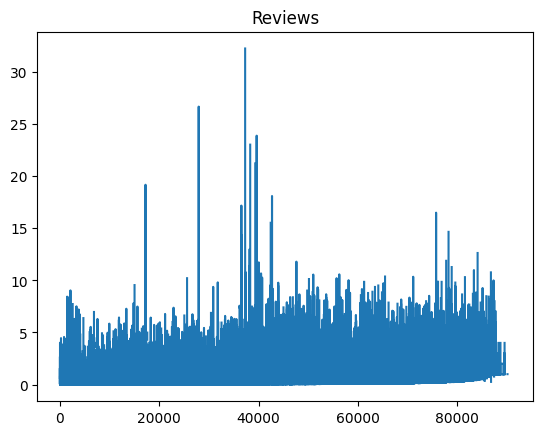

In [44]:
plt.plot(df["reviews_per_month"])
plt.title("Reviews")
plt.show

In [47]:
df_encoding = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'])

In [50]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,159736,A double Room 5mins from King's College Hospital,766056,Trevor,NaN,Lambeth,51.46788,-0.09993,Private room,65.0,4,96,2023-04-29,0.62,4,268,1,NaN
1,312761,Spacious Central London Apartment by Hoxton Sq...,1608226,Pippa,NaN,Hackney,51.52704,-0.08129,Entire home/apt,160.0,9,122,2024-02-03,0.86,1,81,26,NaN
2,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,65.0,1,41,2023-11-26,0.25,3,351,1,NaN
3,165336,Charming Flat in Notting Hill,761400,Nathan,NaN,Kensington and Chelsea,51.51735,-0.21076,Entire home/apt,100.0,1,237,2024-03-17,1.57,1,3,25,NaN
4,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,120.0,4,94,2023-05-01,0.54,1,88,2,NaN


In [52]:
room_type_analysis = df.groupby("room_type").agg(
listings_count=("calculated_host_listings_count","mean"),
          availability = ("availability_365","count"),
          average_reviews = ("reviews_per_month","mean"))
print(room_type_analysis)

                 listings_count  availability  average_reviews
room_type                                                     
Entire home/apt       23.270838         57263         0.856453
Hotel room            44.569061           181         0.689664
Private room          10.247830         32954         0.998891
Shared room            4.498911           459         0.991176


In [57]:
corelation_calculate = df["number_of_reviews"].corr(df["price"])
print(corelation_calculate)

-0.043197883758793604


In [60]:
price_range_df = df.groupby("room_type").agg(
    min_price = ("price","min"),
    max_price = ("price","max"),
    average_price = ("price","mean")
)
print(price_range_df)

                 min_price  max_price  average_price
room_type                                           
Entire home/apt        9.0    50000.0     226.296318
Hotel room            28.0      891.0     221.535714
Private room           0.0    53588.0      88.159115
Shared room           11.0     8888.0     145.146758


In [61]:
average_prices=df.groupby("room_type").agg(
    average_price=("price","mean")
)
print(average_prices)

                 average_price
room_type                     
Entire home/apt     226.296318
Hotel room          221.535714
Private room         88.159115
Shared room         145.146758


In [62]:
most_expensive = df.sort_values(by="price",ascending=False)
print(most_expensive)


                        id                                              name  \
10438             13254774                               No Longer Available   
27123             30004985                 Quiet flat in the heart of London   
7686               9721759  3 Bed Flat in South Hampstead with Large Garden!   
42693             52112740                                                 —   
70159   943540074261545116                         Foxter Properties Chelsea   
...                    ...                                               ...   
87525  1089246720195600867          Modern Deco Two Bedrooms House in London   
87666  1093296855207837501                            Cozy and spacious flat   
88043  1095441435477010989               Magical townhouse getaway in London   
88055  1096451917769415868   Jochebed House|Brixton Centre|Spacious|LongTerm   
88727  1100946494095204584                       Terrace in Brixton/ Clapham   

         host_id        host_name  neig

In [64]:
correlation1 = df["number_of_reviews"].corr(df["price"])
print(correlation1)


-0.043197883758793604


In [65]:
correlation2 = df["reviews_per_month"].corr(df["price"])
print(correlation2)

-0.05279900037998618
